# 🌬️ Analyse av luftkvalitetsdata med NILU API
Denne notebooken dokumenterer hele arbeidsflyten for NILU-delen av prosjektet. Målet er å rense, transformere og visualisere luftkvalitetsdata (NO₂, O₃, SO₂) for bruk i senere analyse. 

### Datakilde: NILU API

**Kilde**: [api.nilu.no](https://api.nilu.no/)  
**Leverandør**: Norsk institutt for luftforskning (NILU)  
**Datakvalitet**: Høy – data fra offisielle målestasjoner  
**Tilgjengelighet**: Åpen (ingen API-nøkkel nødvendig for grunnleggende tilgang)  
**Brukervennlighet**: God, med REST-endepunkter og dokumentasjon

Valget av NILU API er basert på følgende kriterier:

- Kildeautoritet: NILU er en ledende institusjon innen luftkvalitetsforskning.
- Datakvalitet: Målinger fra sertifiserte og kalibrerte målestasjoner.
- Tilgjengelighet: Tilgjengelig for allmennheten uten behov for API-nøkkel.
- Brukervennlighet: Strukturert respons i JSON og fleksible parametere.

---

### ☁️ Henting og prosessering av luftkvalitetsdata (NILU API)

I denne delen av prosjektet benyttes **NILU API** for å hente luftkvalitetsdata for Oslo og nærliggende områder. Dataene struktureres og lagres i JSON-format.


#### Funksjonalitet

1. **Henting av luftkvalitetsdata**:
   - Geografisk område: Oslo
   - Koordinater: `59.9139`, `10.7522`
   - Radius: `20 km`
   - Periode: 2010-01-01 til 2016-04-02
   - Endepunkt: `https://api.nilu.no/stats/day/{from_date}/{to_date}/{latitude}/{longitude}/{radius}`

2. **Prosessering og lagring av data**:
   - Bearbeiding av JSON-respons
   - Strukturert dataeksport til:
     - Mappe: `../../data/raw_data/`
     - Filnavn: `raw_air_quality_nilu_oslo.json`

#### Forutsetninger

- Python installert med nødvendige biblioteker: `requests`, `json`, `os`, `pathlib`
- Tilgang til [NILU API](https://api.nilu.no/)
- Skrivetilgang til katalogen: `../../data/raw_data/`


In [26]:
#Globale paramtere for niluAPI
import sys
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Parametere for niluAPI
base_url = "https://api.nilu.no/stats/day/"
from_date = "2010-04-02"
to_date = "2016-12-31"
radius=20

#Oslo kordinater
latitude= 59.9139
longitude=10.7522

##Filbane 
sys.path.insert(0, '../../src')

In [27]:
from niluAPI.data_niluAPI import get_raw_data_niluAPI
get_raw_data_niluAPI()

Gruppert data er lagret under ../../data/raw_data/raw_air_quality_nilu_oslo.json


---
### 🧼 Rensing og klargjøring av NILU-data

Denne delen av prosjektet håndterer rensing og forbedring av luftkvalitetsdata hentet fra **NILU API**. Fokus ligger på å fjerne uteliggere, interpolere manglende data, og korrigere skjevheter i datafordelingen for å gjøre datasettet klarere og mer pålitelig for videre analyser.

#### Funksjonalitet

##### Fjerning av outliers og interpolering

- Leser rådata fra JSON-fil.
- Fjerner outliers på utvalgte gasser: `Verdi_NO2`, `Verdi_O3`, `Verdi_SO2`.
- Interpolerer manglende verdier for å opprettholde kontinuerlig dataserie.
- Lagrer renset data som JSON-fil.

##### Skjevhetskorreksjon av data

- Analyserer datasett for skjevhet i fordeling.
- Bruker Yeo-Johnson transformasjon for å normalfordele variablene.
- Lagrer korrigerte data for videre analyse.


#### Forutsetninger

- Rådata må være tilgjengelig i: `../../data/raw_data/raw_air_quality_nilu_oslo.json`
- Python-moduler fra prosjektmappen må være importert.
- Krever `sys` for path-håndtering og tilgang til spesialfunksjoner.
- Resultater lagres i:
  - Renset data: `../../data/clean_data/niluAPI_clean_data.json`
  - Analysert data: `../../data/analyzed_data/niluAPI_analyzed_data.json`


In [28]:
from niluAPI.data_niluAPI import clean_raw_data
clean_raw_data()

Fjerning av outliers:
Outliers er mer enn 3 standardavvik unna gjennomsnittet

Verdi_NO2:
Fjernet 39 outliers
Standaravvik: 21.74
Gjennomsnitt: 32.25

Verdi_O3:
Fjernet 8 outliers
Standaravvik: 16.29
Gjennomsnitt: 42.08

Verdi_SO2:
Fjernet 27 outliers
Standaravvik: 1.17
Gjennomsnitt: 2.23


Interpolering av Nan-verdier:
Verdi_NO2: 233 verdier ble interpolert
Verdi_O3: 574 verdier ble interpolert
Verdi_SO2: 393 verdier ble interpolert

Gruppert data er lagret under ../../data/clean_data/niluAPI_clean_data.json


In [29]:
from niluAPI.data_niluAPI import fix_skewness_data_niluAPI
fix_skewness_data_niluAPI()

Skjevhet før transformasjon:
→ Verdi_NO2: 1.12
→ Verdi_O3: -0.18
→ Verdi_SO2: 0.76

Behandler kolonner med skjevhet over ±1.0:

 Verdi_NO2: skjevhet 1.12 → Yeo-Johnson + skalering
Verdi_O3: skjevhet -0.18 → kun skalering
Verdi_SO2: skjevhet 0.76 → kun skalering

Skjevhet etter transformasjon:
→ Verdi_NO2_Trans: -0.01
→ Verdi_O3_Trans: -0.18
→ Verdi_SO2_Trans: 0.76

Transformert data lagret i: ../../data/analyzed_data/niluAPI_analyzed_data.json


---
## 📊  Analyse av luftkvalitetsdata fra NILU API (2010-2016)
I denne delen analyseres luftkvalitetsdata for Oslo over en seksårsperiode (2010-2016), hentet fra NILU API. Hensikten er å avdekke trender, sesongvariasjoner og potensielle forbedringer eller forverringer i luftkvaliteten over tid. Dataene inkluderer konsentrasjoner av NO₂, O₃ og SO₂, som er blant de viktigste indikatorene på lokal luftforurensning.

#### Metoder brukt for analyse:
- Pandas – brukt for datarensing, konvertering av datoer, og sammenstilling av datasett med flere kolonner for luftkvalitet og dekningsgrad.
- Plotly (graph_objects) – benyttet til å lage interaktive grafer som gjør det mulig å identifisere trender og vurdere datakvalitet visuelt.
- Fargekoding etter datakvalitet –  gir en visuell indikator på datanes pålitelighet.
- Trendlinjeanalyse – indikere utviklingen over tid for hver luftforurensningskomponent.

Alle analyser ledsages av visualiseringer, og resultatene tolkes med tanke på mulige miljø- og samfunnsmessige årsaker. Datasettet er renset og korrigert for skjevhet for å sikre robusthet i analysene.

### Visualisering av luftkvalitet og datakvalitet

#### Hva gjør funksjonen?
Funksjonen `plot_air_quality()` genererer separate grafer for ulike luftforurensningskomponenter (NO₂, O₃, SO₂). Hver graf viser:

- En **punktsky** av måleverdier over tid.
- En **blå trendlinje** som indikerer utviklingen.
- **Fargekoding** av datapunkter basert på datakvalitet:
  - 🔴 **Rød** – manglende eller interpolerte verdier  
  - 🟡 **Gul** – dekningsgrad under 90 %  
  - 🟢 **Grønn** – god datakvalitet (≥ 90 %)

#### Fordeler ved denne fremstillingsmåten
- **Tydelig kommunikasjon av datakvalitet:** Brukeren får umiddelbar visuell informasjon om hvilke data som er pålitelige.
- **Støtter tolkning av trender:** Trendlinjer hjelper med å identifisere mønstre over tid.
- **Fleksibel og gjenbrukbar struktur:** Funksjonen tar generelle parametere og kan brukes på andre variabler, stasjoner og tidsperioder.
- **Styrker datadrevne beslutninger:** Fremhever både verdier og usikkerheter, noe som er avgjørende for miljøanalyse og -rapportering.

#### Relevans og Anvendelse
Denne funksjonen er sentral i å visualisere endringer i luftkvalitet over tid, og demonstrerer effektiv bruk av **interaktive visualiseringer** for å kommunisere både måleverdier og datakvalitet. Gjennom fargekoding av datapunkter gir grafene ikke bare innsikt i luftforurensning, men også i påliteligheten til datagrunnlaget.

Visualiseringene gir følgende fordeler og anvendelser:

- **Formidling av datakvalitet:** Brukeren ser umiddelbart hvilke målinger som er komplette, delvis mangelfulle eller interpolerte.
- **Overvåking og miljøanalyse:** Egnet for både forskningsformål og offentlig rapportering.
- **Beslutningsstøtte:** Kan brukes som verktøy i politikkutforming og miljøtiltak.
- **Tilgjengelighet for publikum:** Plotly gir interaktivitet som lar brukeren utforske dataene selv.






In [30]:
from niluAPI.data_niluAPI import load_and_plot_air_quality
load_and_plot_air_quality()

## Analyse av *månedlig* luftkvalitet i Oslo (2010-2016)

Grafen over viser utviklingen i gjennomsnittlig månedlig konsentrasjon av NO₂ (nitrogendioksid), O₃ (ozon) og SO₂ (svoveldioksid) i Oslo over perioden 2010 til 2016. Dataene er aggregert per måned. 

### Observasjoner:

- **NO₂ (blå linje)**:
  - Har tydelig sesongvariasjon med høyere verdier om vinteren og lavere om sommeren.

- **O₃ (oransje linje)**:
  - Viser et motsatt mønster sammenlignet med NO₂: høyere verdier om sommeren og lavere om vinteren.
  - Dette skyldes at ozon dannes i atmosfæren ved hjelp av sollys, og nivåene øker derfor i de lysere månedene.

- **SO₂ (grønn linje)**:
  - Har svært lave og stabile verdier i hele perioden.
  - Dette tyder på at utslippene av svoveldioksid er lave og godt regulert i Oslo.


Luftkvaliteten i Oslo viser klare sesongmessige mønstre for NO₂ og O₃. NO₂ er høyest om vinteren, mens O₃ dominerer om sommeren som følge av fotokjemiske reaksjoner. SO₂-nivåene er lave gjennom hele perioden, noe som antyder at det ikke er en stor lokal kilde til dette forurensningsstoffet. Den totale utviklingen antyder at det kan være hensiktsmessig å innføre tiltak for å redusere NO₂, spesielt i vintermånedene.



      Måned  Snitt_NO2   Snitt_O3  Snitt_SO2  AntallDager
0   2010-04  35.294109  64.302514   2.862069           29
1   2010-05  21.199597  59.643414   2.394220           31
2   2010-06  20.604992  62.172153   1.661528           30
3   2010-07  19.245623  59.183333   1.759274           31
4   2010-08  22.120556  49.400958   1.744296           31
..      ...        ...        ...        ...          ...
76  2016-08  15.866144  31.959334   1.179835           31
77  2016-09  11.270938  29.060571   1.426891           30
78  2016-10  18.103540  30.474370   1.923178           31
79  2016-11  38.514975  25.146216   2.166528           30
80  2016-12  46.175656   8.485714   2.040703           31

[81 rows x 5 columns]


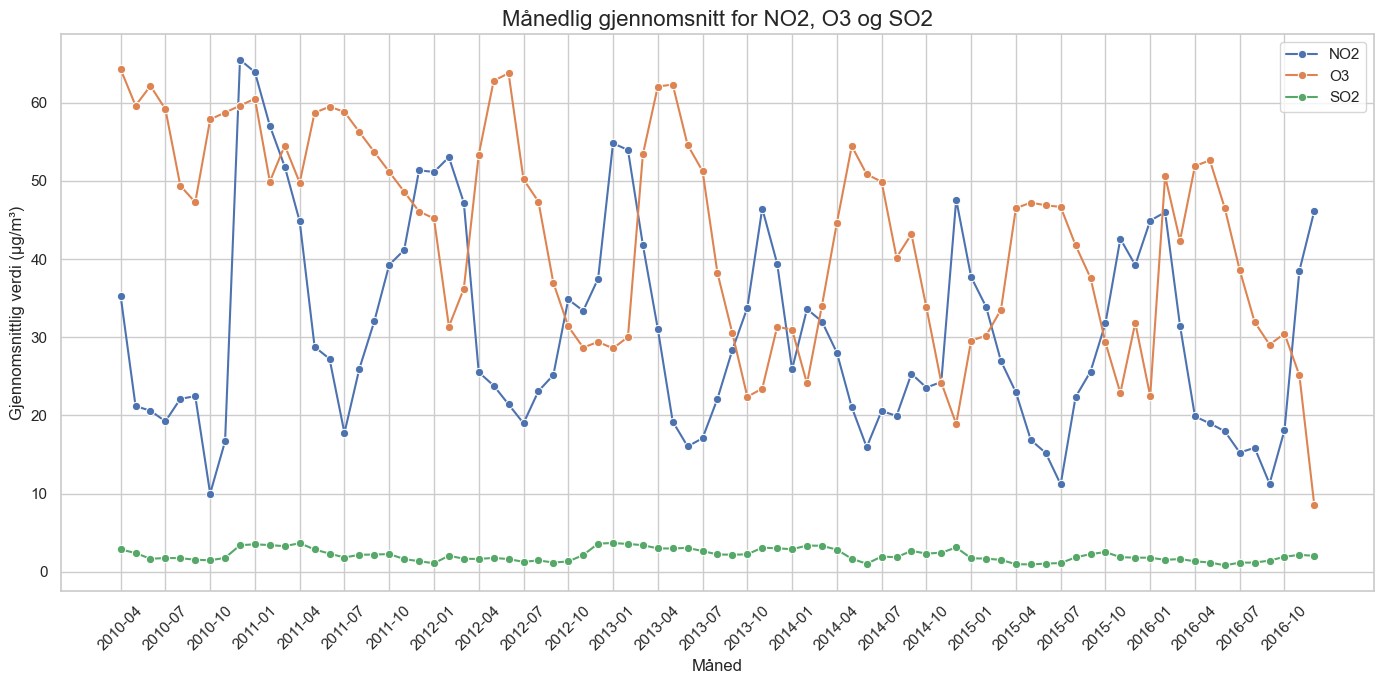

In [31]:
df = pd.read_json("../../data/clean_data/niluAPI_clean_data.json")
query = """
SELECT 
    strftime('%Y-%m', Dato) AS Måned, 
    AVG(Verdi_NO2) AS Snitt_NO2,
    AVG(Verdi_O3) AS Snitt_O3,
    AVG(Verdi_SO2) AS Snitt_SO2,
    COUNT(*) AS AntallDager
FROM df
GROUP BY Måned
ORDER BY Måned
"""

    # Execute the query
pysqldf = lambda q: sqldf(q, globals())
monthly_stats = pysqldf(query)


print(monthly_stats)

# Plotter månedlig statistikk
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.lineplot(data=monthly_stats, x="Måned", y="Snitt_NO2", label="NO2", marker="o")
sns.lineplot(data=monthly_stats, x="Måned", y="Snitt_O3", label="O3", marker="o")
sns.lineplot(data=monthly_stats, x="Måned", y="Snitt_SO2", label="SO2", marker="o")

plt.title("Månedlig gjennomsnitt for NO2, O3 og SO2", fontsize=16)
plt.xlabel("Måned")
plt.ylabel("Gjennomsnittlig verdi (μg/m³)")
plt.xticks(rotation=45)
plt.gca().set_xticks(monthly_stats['Måned'][::3])
plt.legend()
plt.tight_layout()
plt.show()

---
[⬅️ Forrige: Frost-analyse](../frostAPI/frostAPI.ipynb)                    
[➡️ Neste: Kombinert analyse](../Kombinert_analyse.ipynb) 